# 📓 Regresión Lineal con PyTorch
### Caso: Predicción del peso de un gato según su tamaño 🐱📏

En este notebook se implementa un modelo de **regresión lineal simple** con PyTorch. El objetivo es predecir el **peso de un gato (kg)** a partir de su **tamaño (cm)**.

Se mostrarán:
- Generación de datos sintéticos.
- Definición del modelo.
- Entrenamiento con descenso de gradiente.
- Evaluación y visualización de resultados.
- Predicciones de ejemplo.

## 1. Preparación del entorno

In [9]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import math
import numpy as np

## 2. Generación de datos sintéticos
Simulamos la relación entre el tamaño (cm) y el peso (kg) de un gato, agregando algo de ruido para imitar datos reales.

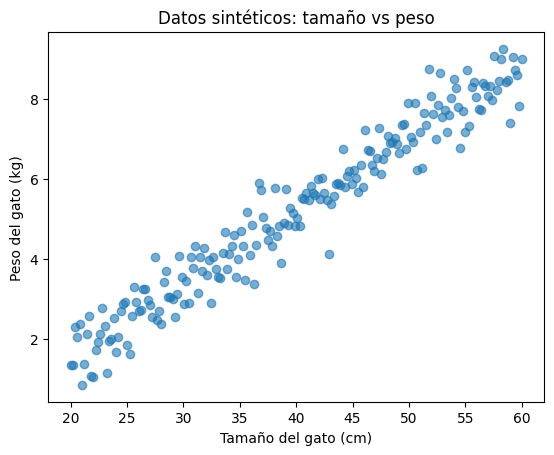

In [10]:
# Datos sintéticos
x_raw = torch.linspace(20, 60, 200).unsqueeze(1)  # tamaños en cm
x = (x_raw - x_raw.mean()) / x_raw.std()          # normalización

# Relación lineal con ruido
y = (
    0.18 * x_raw - 2
    + 0.5 * torch.randn(200, 1)     # ruido normal
    + 0.02 * (x_raw**1.5) / 100     # ligera curvatura
)

plt.scatter(x_raw, y, alpha=0.6)
plt.xlabel("Tamaño del gato (cm)")
plt.ylabel("Peso del gato (kg)")
plt.title("Datos sintéticos: tamaño vs peso")
plt.show()

## 3. Definición del modelo
Un regresor lineal simple con una sola capa Linear.

In [11]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # entrada=1, salida=1

    def forward(self, x):
        return self.linear(x)

## 4. Entrenamiento del modelo
Usamos descenso de gradiente estocástico (SGD) y error cuadrático medio (MSE).

In [12]:
model = LinearRegressor()
optim = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

losses = []
for epoch in range(1000):
    pred = model(x)
    loss = loss_fn(pred, y)

    if torch.isnan(loss):
        raise ValueError("El entrenamiento produjo NaN en la pérdida")

    optim.zero_grad()
    loss.backward()
    optim.step()
    losses.append(loss.item())

print("Última pérdida (MSE):", losses[-1])

Última pérdida (MSE): 0.9843416810035706


## 5. Evolución de la pérdida

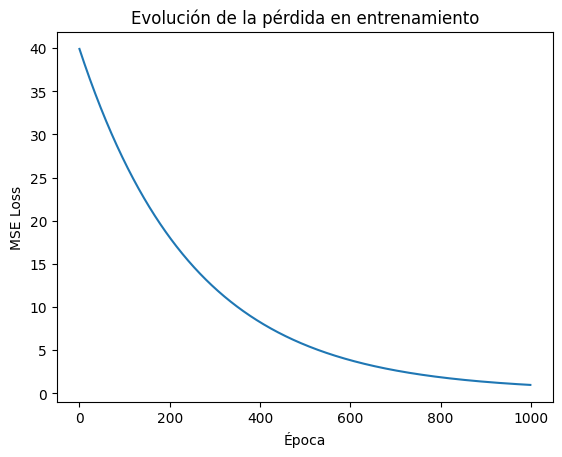

In [13]:
plt.plot(losses)
plt.xlabel("Época")
plt.ylabel("MSE Loss")
plt.title("Evolución de la pérdida en entrenamiento")
plt.show()

## 6. Predicciones de ejemplo
Hacemos predicciones para diferentes tamaños de gato.

In [14]:
def predict(size_cm):
    if size_cm < 15 or size_cm > 125:
        raise ValueError("El tamaño debe estar entre 15 y 125 cm.")

    # normalización aproximada
    x_norm = (torch.tensor([[size_cm]], dtype=torch.float32) - 40) / 10
    with torch.no_grad():
        peso_pred = model(x_norm).item()
    return max(peso_pred, 0.5)  # mínimo 0.5 kg

ejemplos = [25, 40, 55]
for t in ejemplos:
    print(f"Tamaño: {t} cm → Peso predicho: {predict(t):.2f} kg")

Tamaño: 25 cm → Peso predicho: 1.70 kg
Tamaño: 40 cm → Peso predicho: 4.42 kg
Tamaño: 55 cm → Peso predicho: 7.14 kg


## 7. Visualización del ajuste del modelo

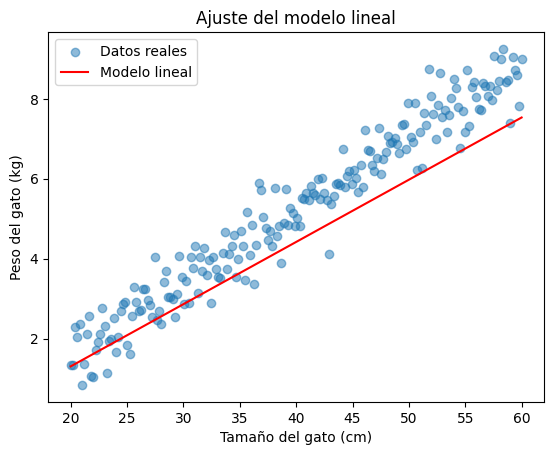

In [15]:
# Predicciones en todo el rango
with torch.no_grad():
    y_pred = model(x)

plt.scatter(x_raw, y, alpha=0.5, label="Datos reales")
plt.plot(x_raw, y_pred, color="red", label="Modelo lineal")
plt.xlabel("Tamaño del gato (cm)")
plt.ylabel("Peso del gato (kg)")
plt.title("Ajuste del modelo lineal")
plt.legend()
plt.show()

## 8. Conclusiones
- El modelo lineal logra **capturar la tendencia general** entre el tamaño y el peso de los gatos.
- Debido al ruido y ligera curvatura en los datos, la predicción no es perfecta, pero es útil como aproximación.
- Se puede mejorar con:
  - Más datos.
  - Modelos no lineales.
  - Ajuste de hiperparámetros.